In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset into a pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

In [3]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3, random_state=42)

In [5]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Instantiate a DecisionTreeClassifier object with the desired hyperparameters
out = DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
# Train the decision tree classifier using the training set
out.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# Use the trained model to make predictions on the testing set
y_pred = out.predict(X_test)


Accuracy: 0.897070467141726
Precision: 0.9136842105263158
Recall: 0.8298279158699808
F1-score: 0.8697394789579158


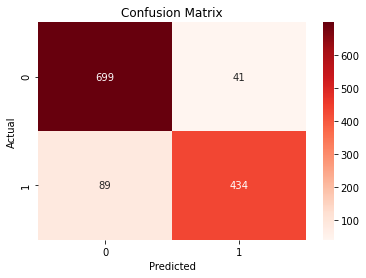

In [9]:
# Evaluate the performance of the model using appropriate metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Step 7: Evaluate the model using confusion matrix

sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()